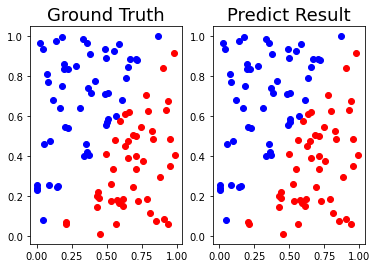

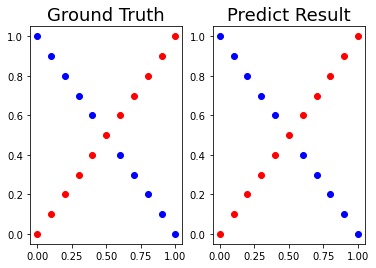

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linear(n=100):
    pts = np.random.uniform(0, 1, (n, 2))
    inputs = []
    labels = []
    for pt in pts:
        inputs.append([pt[0], pt[1]])
        distance = (pt[0] - pt[1]) / 1.414
        if pt[0] > pt[1]:
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs), np.array(labels).reshape(n, 1)
    
def generate_XOR_easy():
    inputs = []
    labels = []
    for i in range(11):
        inputs.append([0.1 * i, 0.1 * i])
        labels.append(0)
        if 0.1 * i == 0.5:
            continue
        inputs.append([0.1 * i, 1 - 0.1 * i])
        labels.append(1)
    return np.array(inputs), np.array(labels).reshape(21, 1)

def show_result(x, y, pred_y):
    plt.subplot(1, 2, 1)
    plt.title('Ground Truth', fontsize = 18)
    for i in range(x.shape[0]):
        if y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
            
    plt.subplot(1, 2, 2)
    plt.title('Predict Result', fontsize = 18)
    for i in range(x.shape[0]):
        if pred_y[i] == 0:
            plt.plot(x[i][0], x[i][1], 'ro')
        else:
            plt.plot(x[i][0], x[i][1], 'bo')
    plt.show()
    
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def derivative_sigmoid(x):
    return np.multiply(x, 1.0 - x)

x1, y1 = generate_linear()
x2, y2 = generate_XOR_easy()

show_result(x1, y1, y1)
show_result(x2, y2, y2)